In [1]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# reading the dataset

dataset = pd.read_csv("HAM10000_metadata.csv")
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:
# The diesease- dx is made into a more human readable format of which type of skin cancer cell it is
lesion_type_dict = {
                    'nv': 'Melanocytic nevi',
                    'mel': 'Melanoma',
                    'bkl': 'Benign keratosis-like lesions ',
                    'bcc': 'Basal cell carcinoma',
                    'akiec': 'Actinic keratoses',
                    'vasc': 'Vascular lesions',
                    'df': 'Dermatofibroma'
                    }

dataset['cell_type'] = dataset['dx'].map(lesion_type_dict.get) 
dataset['cell_type_idx'] = pd.Categorical(dataset['cell_type']).codes

dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2


In [11]:
# check value counts of all instances 
for x in ['sex', 'localization', 'cell_type']:
    print(dataset[x].value_counts())

male       5406
female     4552
unknown      57
Name: sex, dtype: int64
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: cell_type, dtype: int64


In [4]:
# describe the features 
# check nulls
print(f"Null Values present: \n{dataset.isnull().sum()}")
# check unique values
print(f"Unique Lesions Images: {len(set(dataset.lesion_id))}")


Null Values present: 
lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
dataset           0
cell_type         0
cell_type_idx     0
dtype: int64
Unique Lesions Images: 7470


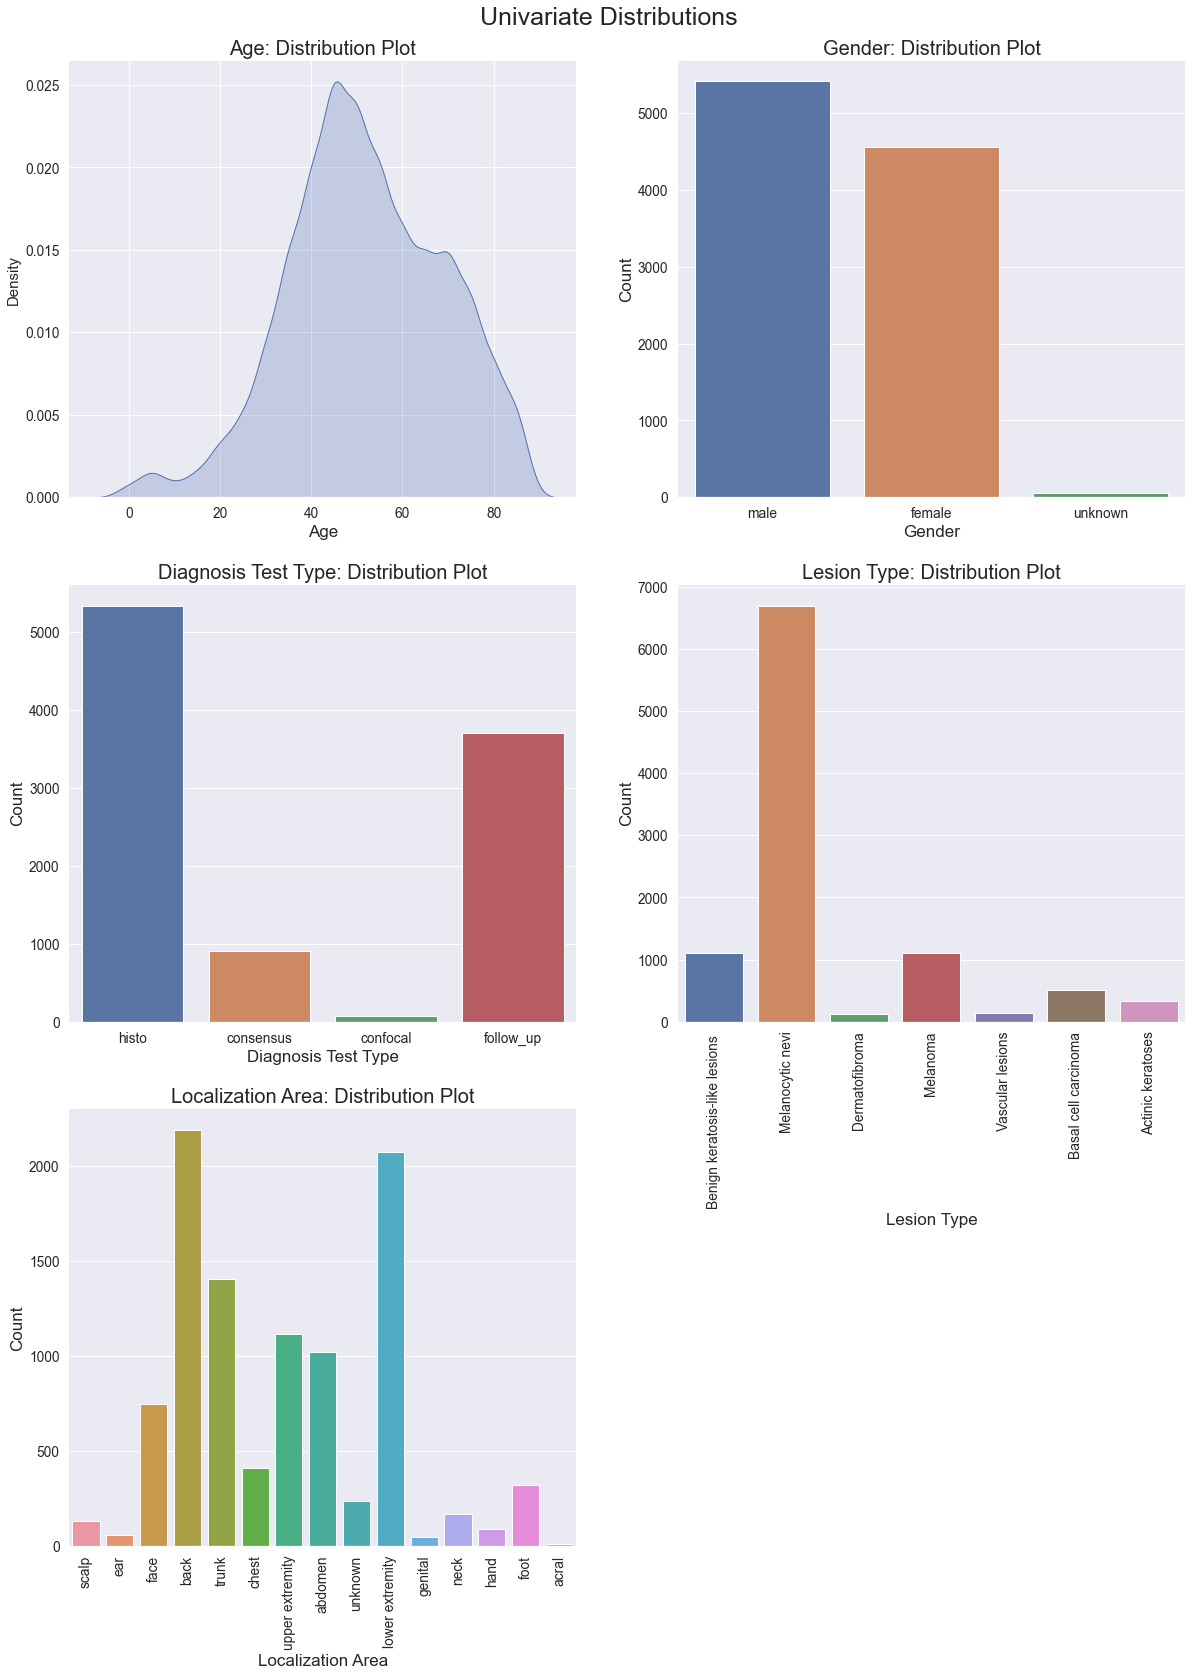

In [5]:
sns.set(font_scale = 1.25)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 2, figsize=(20, 25))
sns.despine(left=True)

# Age distribution
sns.kdeplot(dataset["age"], legend = False, shade = True, ax=axes[0, 0])
axes[0,0].set_xlabel("Age", fontsize=17)
axes[0,0].set_title("Age: Distribution Plot", fontsize=20)

# Gender distribution
sns.countplot(x = "sex", data = dataset, ax=axes[0, 1])
axes[0,1].set_xlabel("Gender", fontsize=17)
axes[0,1].set_title("Gender: Distribution Plot", fontsize=20)
axes[0,1].set_ylabel("Count", fontsize=17)

# Diagnosis Test type distribution
sns.countplot(x = "dx_type", data = dataset, ax=axes[1, 0])
axes[1,0].set_xlabel("Diagnosis Test Type", fontsize=17)
axes[1,0].set_ylabel("Count", fontsize=17)
axes[1,0].set_title("Diagnosis Test Type: Distribution Plot", fontsize=20)

# Lesion type distribution
sns.countplot(x = "cell_type", data = dataset, ax=axes[1, 1])
axes[1,1].set_xlabel("Lesion Type", fontsize=17)
axes[1,1].set_ylabel("Count", fontsize=17)
axes[1,1].set_title("Lesion Type: Distribution Plot", fontsize=20)

## Lesion type distribution
sns.countplot(x = "localization", data = dataset, ax=axes[2, 0])
axes[2,0].set_xlabel("Localization Area", fontsize=17)
axes[2,0].set_ylabel("Count", fontsize=17)
axes[2,0].set_title("Localization Area: Distribution Plot", fontsize=20)

c = 0
for ax in f.axes:
    c+=1
    if c<=3:
        continue
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.subplots_adjust(top=0.95)
f.suptitle('Univariate Distributions', fontsize=25)
f.delaxes(axes[2,1]) 


Observations

1. Our target variable - "cell_type" is highly imbalanced containing more samples of one class which can introduce the problem of class imbalance in the training dataset

2. We have slightly skewed right distribution of age variable.  Fill the missing values using median.

3. Localization Area, Gender and Age can be various other factors which affect the diagnosis of cancer. Need to carefully consider their ration while handling the class imbalance problem

In [6]:
# imputation with median values as we have an ordinal variable age, and less sensitive to extremes
dataset["age"].fillna(dataset.age.median(), inplace = True)

In [7]:
def class_analysis(df, x):
    
    """
    Takes an Input x string as the disease type and generated individual distributions for all classes for all variables
    
    """
        
    sns.set(font_scale = 1.25)  
    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(20, 25))
    sns.despine(left=True)  
    # Age distribution
    sns.kdeplot(df[df['cell_type'] == x]["age"], legend = False, shade = True, ax=axes[0, 0])
    axes[0,0].set_xlabel("Age", fontsize=17)
    axes[0,0].set_title("Age: Distribution Plot", fontsize=20)  
    # Gender distribution
    sns.countplot(x = "sex", data = df[df['cell_type'] == x], ax=axes[0, 1])
    axes[0,1].set_xlabel("Gender", fontsize=17)
    axes[0,1].set_title("Gender: Distribution Plot", fontsize=20)
    axes[0,1].set_ylabel("Count", fontsize=17)  
    # Diagnosis Test type distribution
    sns.countplot(x = "dx_type", data = df[df['cell_type'] == x], ax=axes[1, 0])
    axes[1,0].set_xlabel("Diagnosis Test Type", fontsize=17)
    axes[1,0].set_ylabel("Count", fontsize=17)
    axes[1,0].set_title("Diagnosis Test Type: Distribution Plot", fontsize=20)  
    ## Lesion type distribution
    sns.countplot(x = "localization", data = df[df['cell_type'] == x], ax=axes[1, 1])
    axes[1,1].set_xlabel("Localization Area", fontsize=17)
    axes[1,1].set_ylabel("Count", fontsize=17)
    axes[1,1].set_title("Localization Area: Distribution Plot", fontsize=20)    
    c = 0
    for ax in f.axes:
        c+=1
        if c<=3:
            continue
        plt.sca(ax)
        plt.xticks(rotation=90)
        
    plt.subplots_adjust(top=0.95)
    f.suptitle(f'Univariate Distributions for class {x}', fontsize=25)
    img_name = "analysis"+x
    f.savefig(img_name)
    

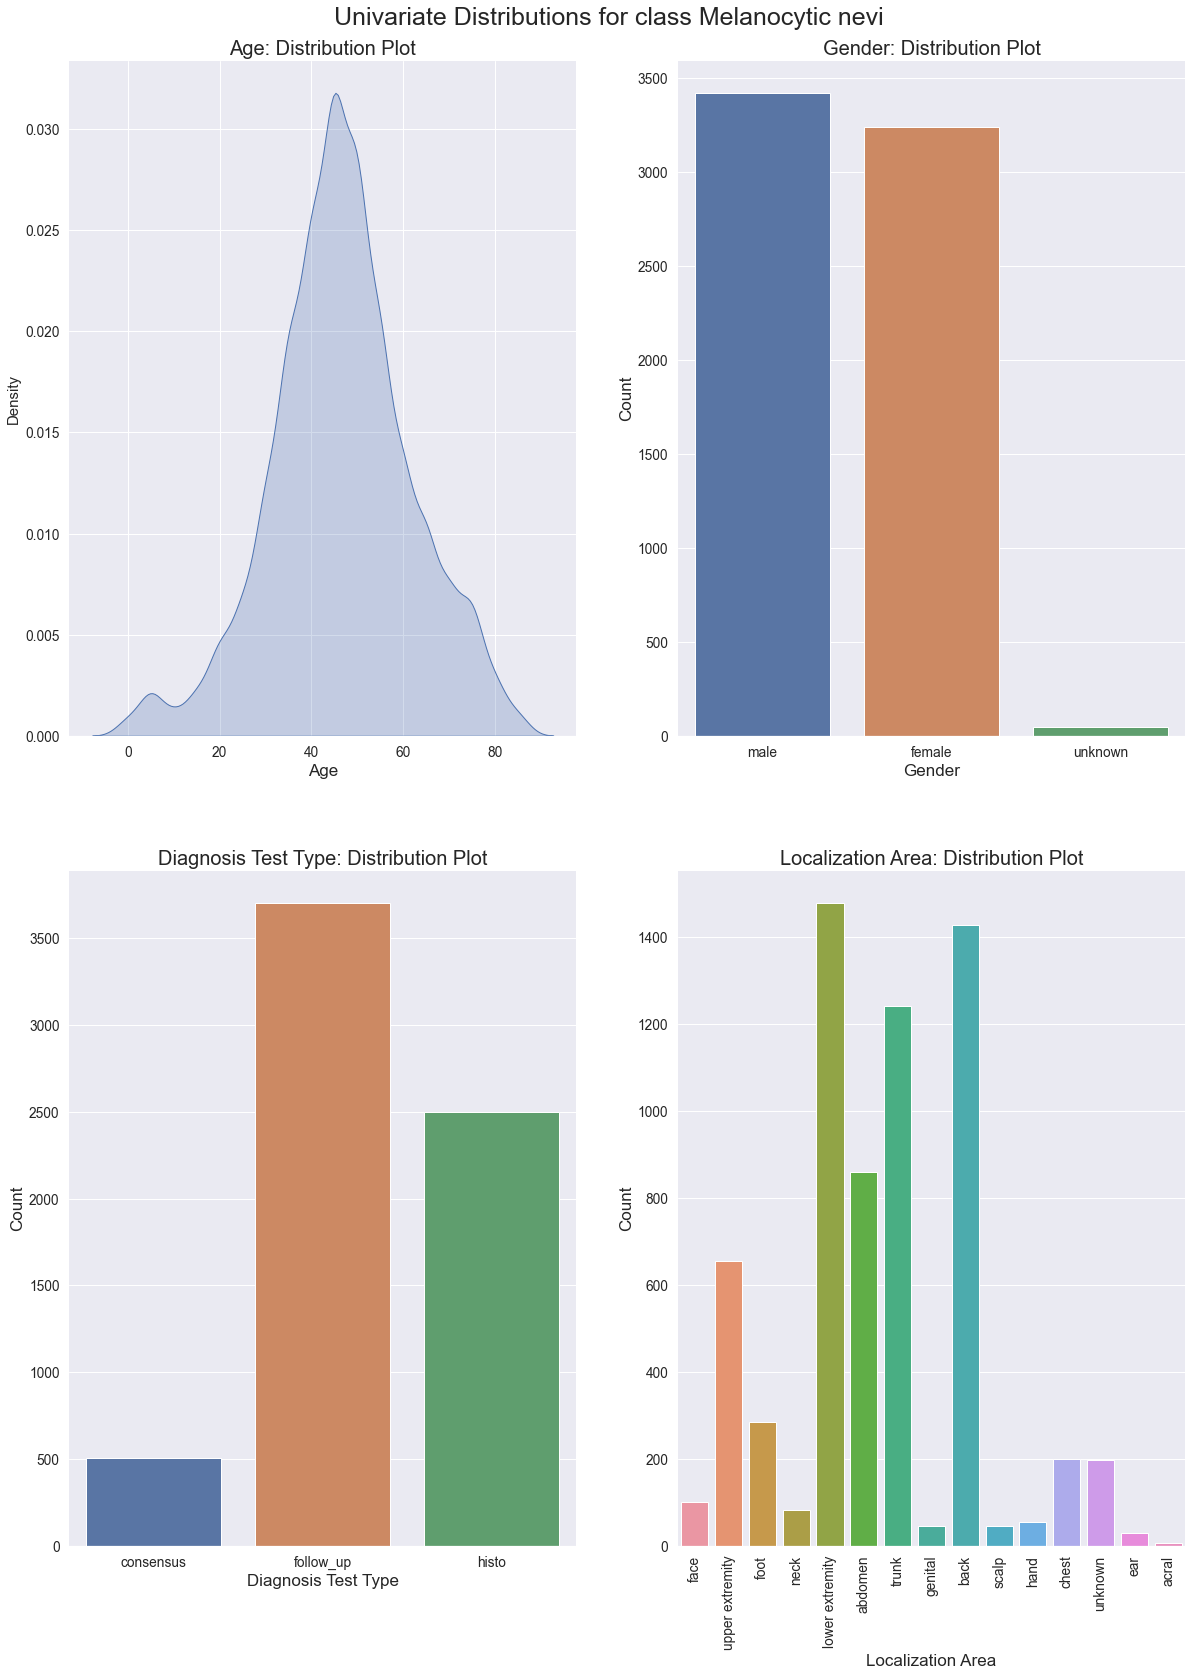

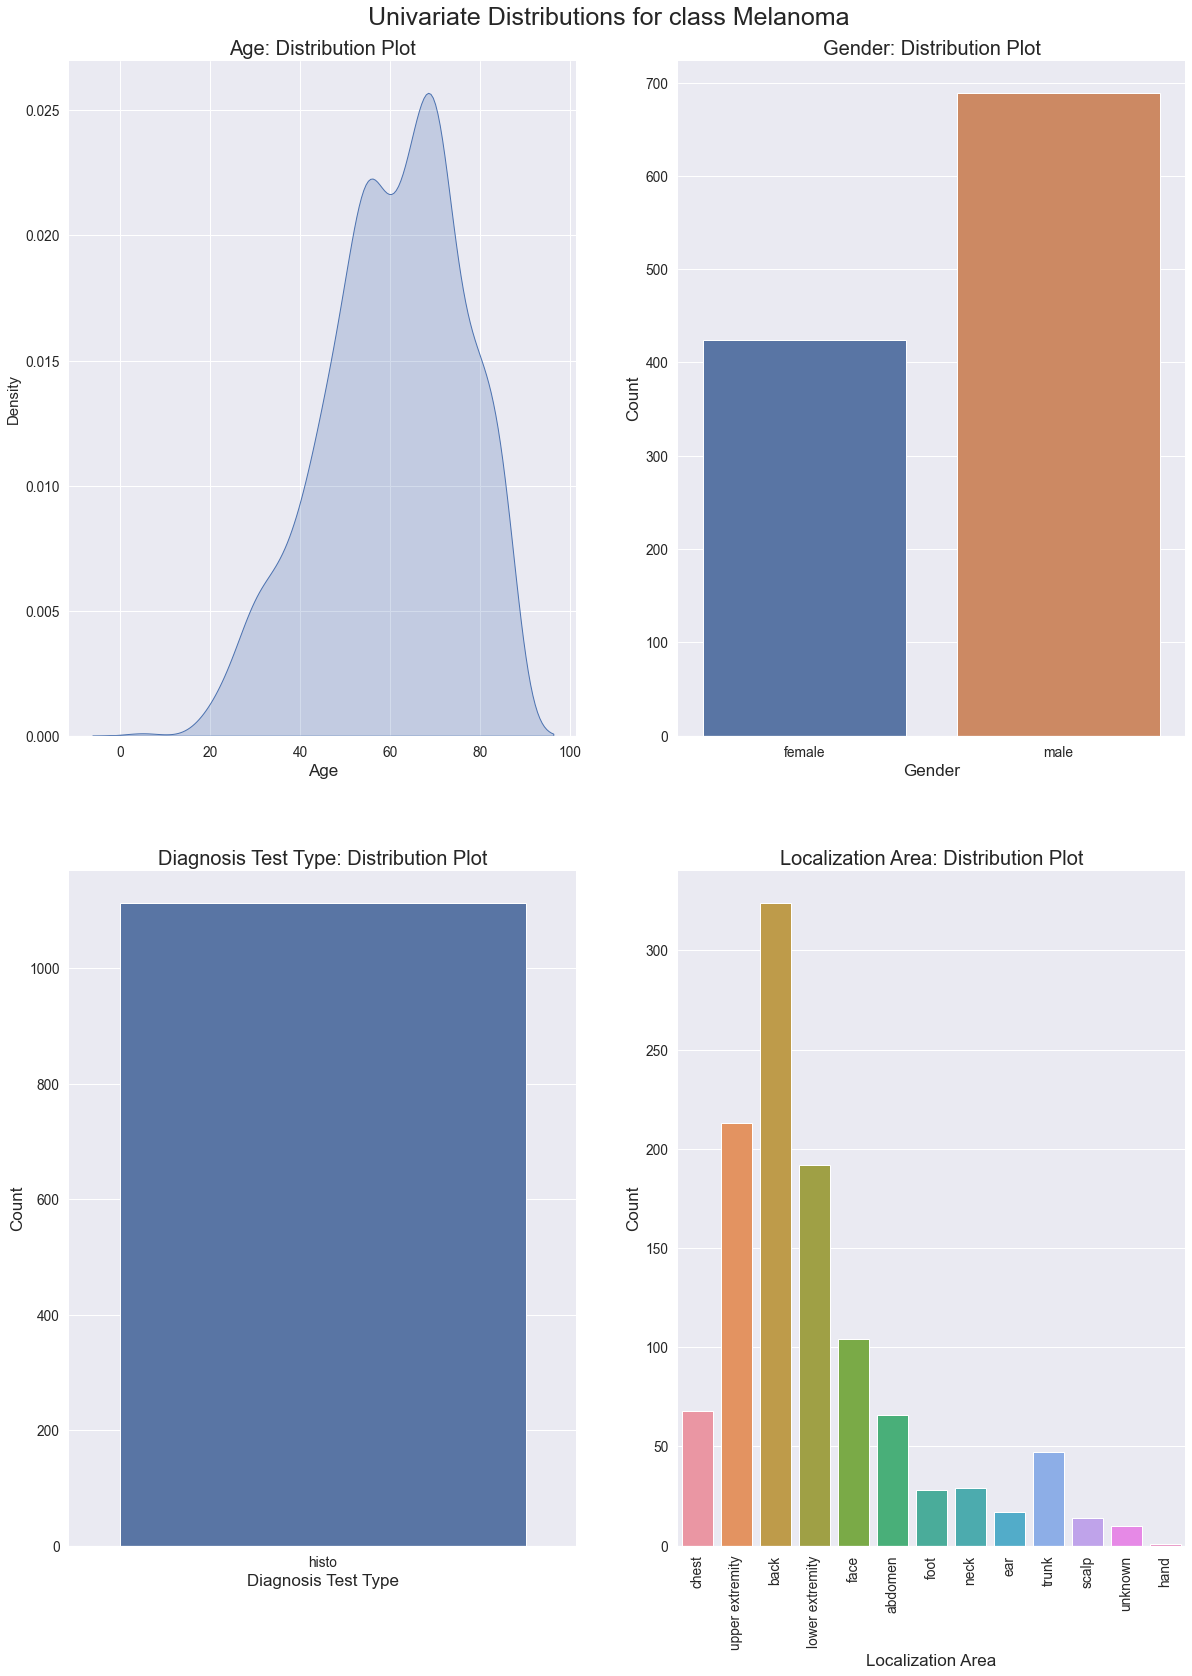

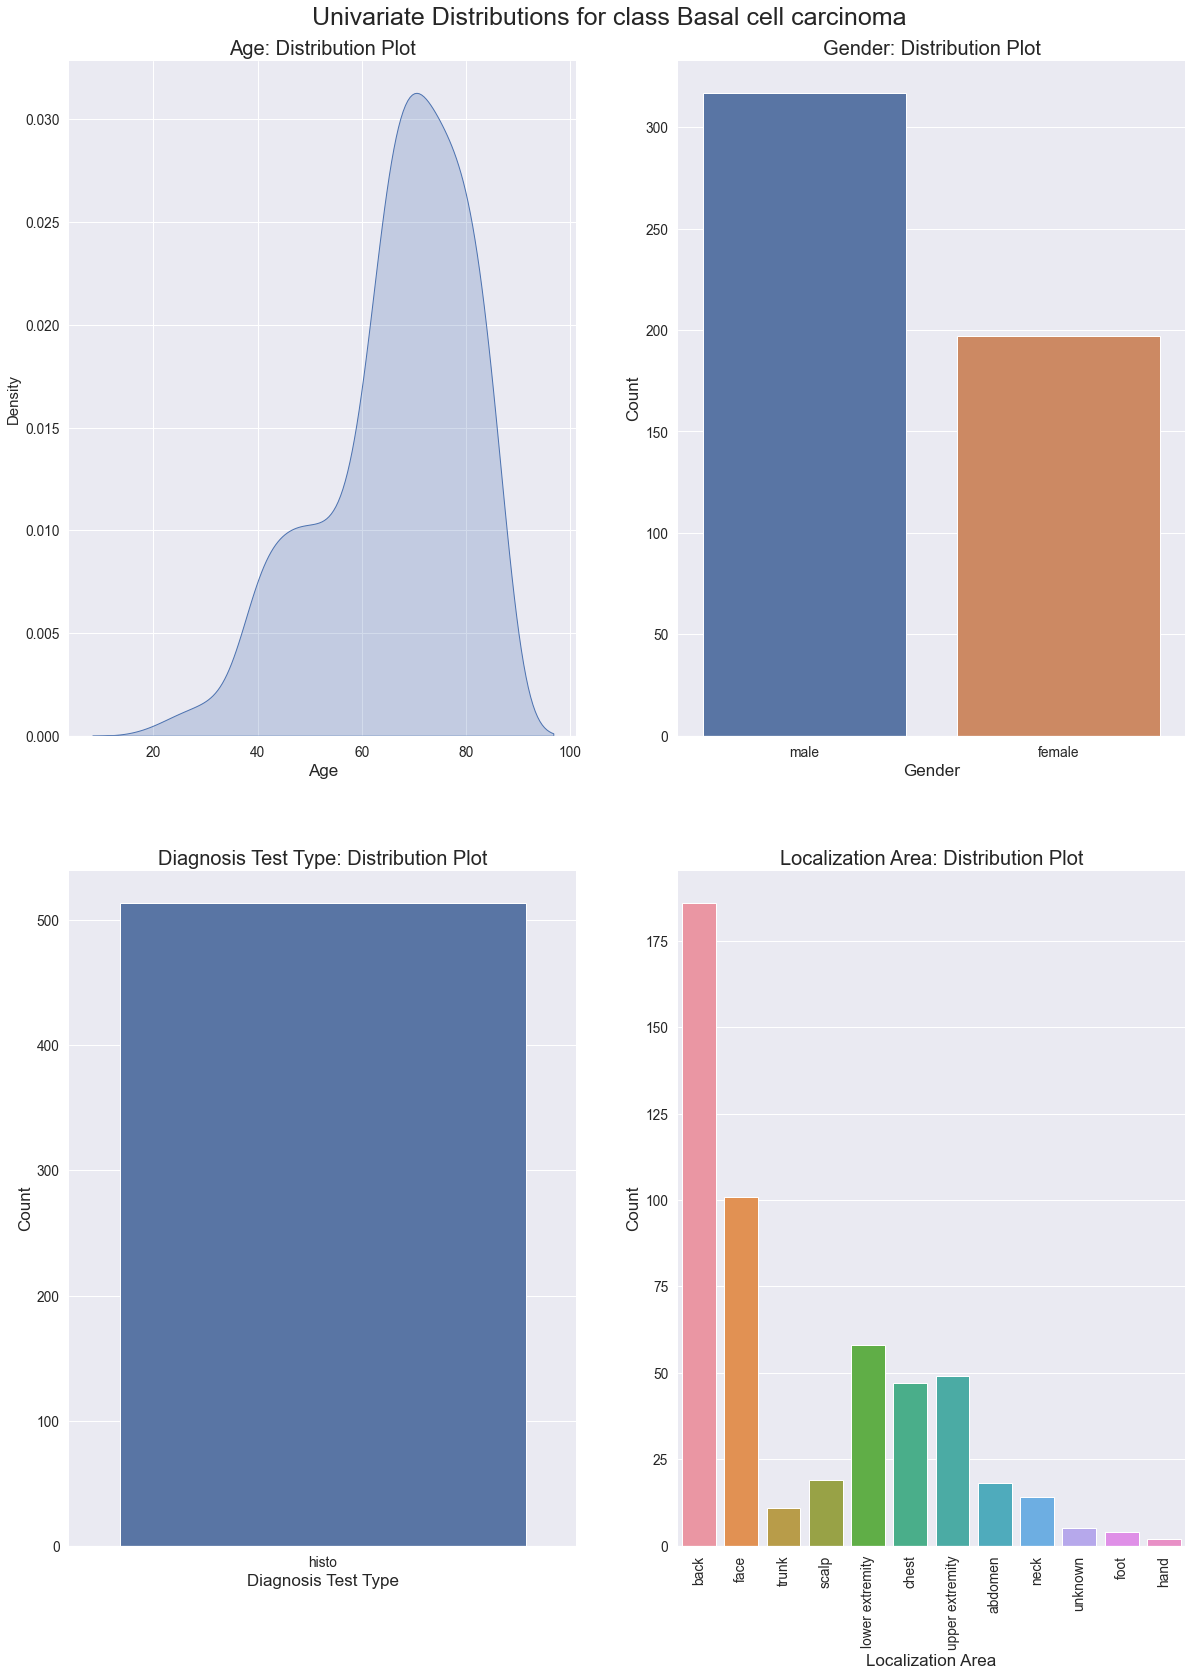

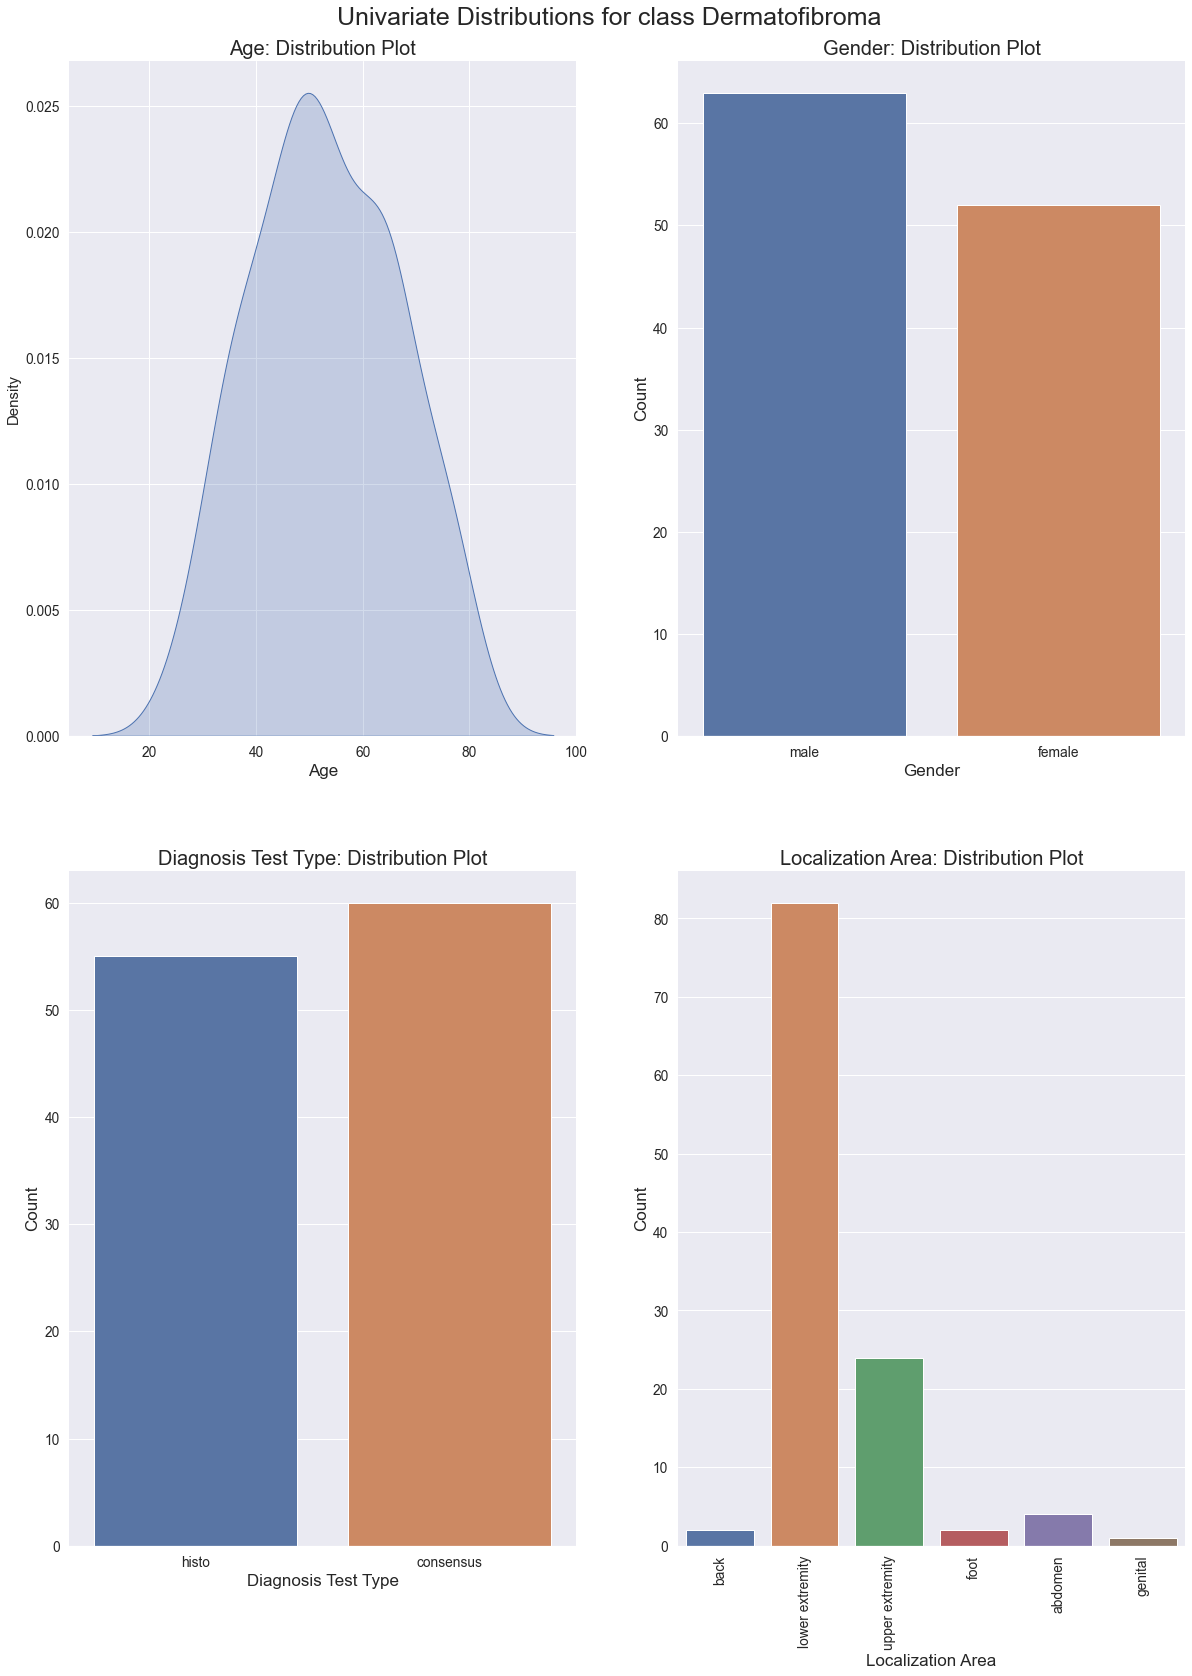

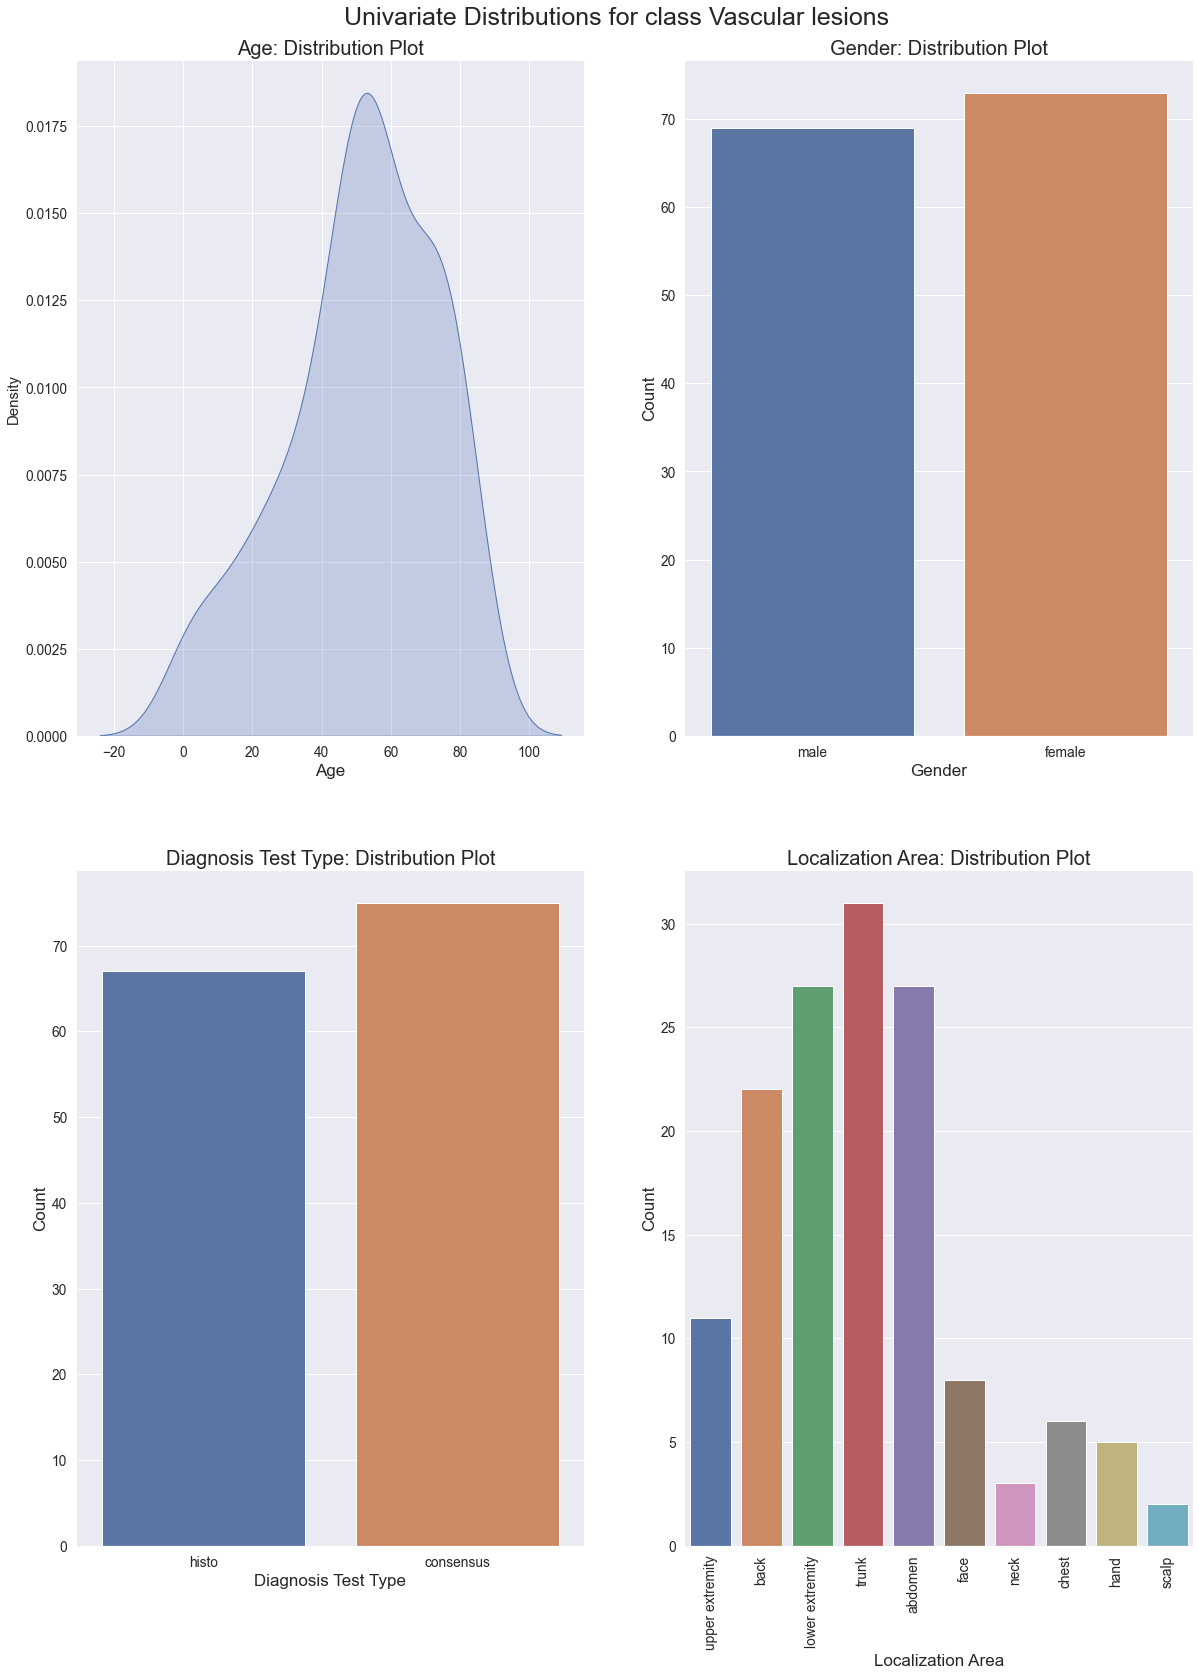

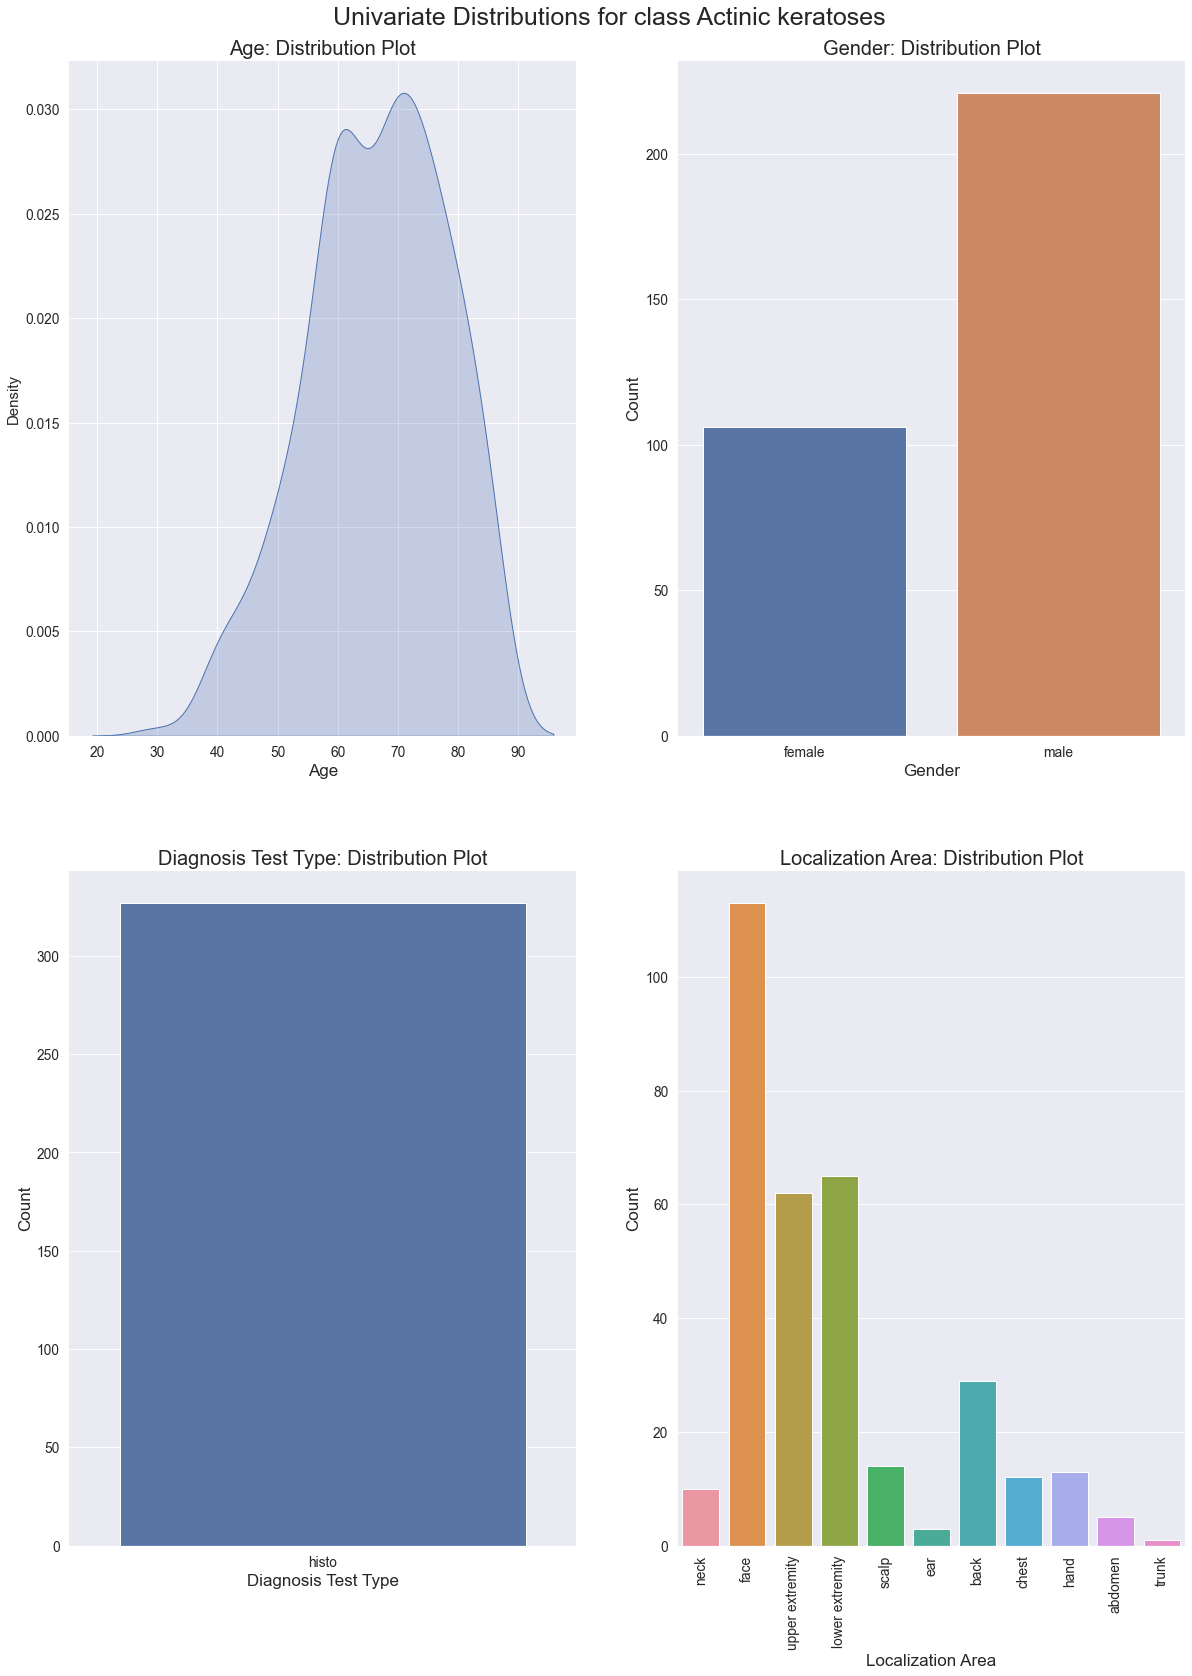

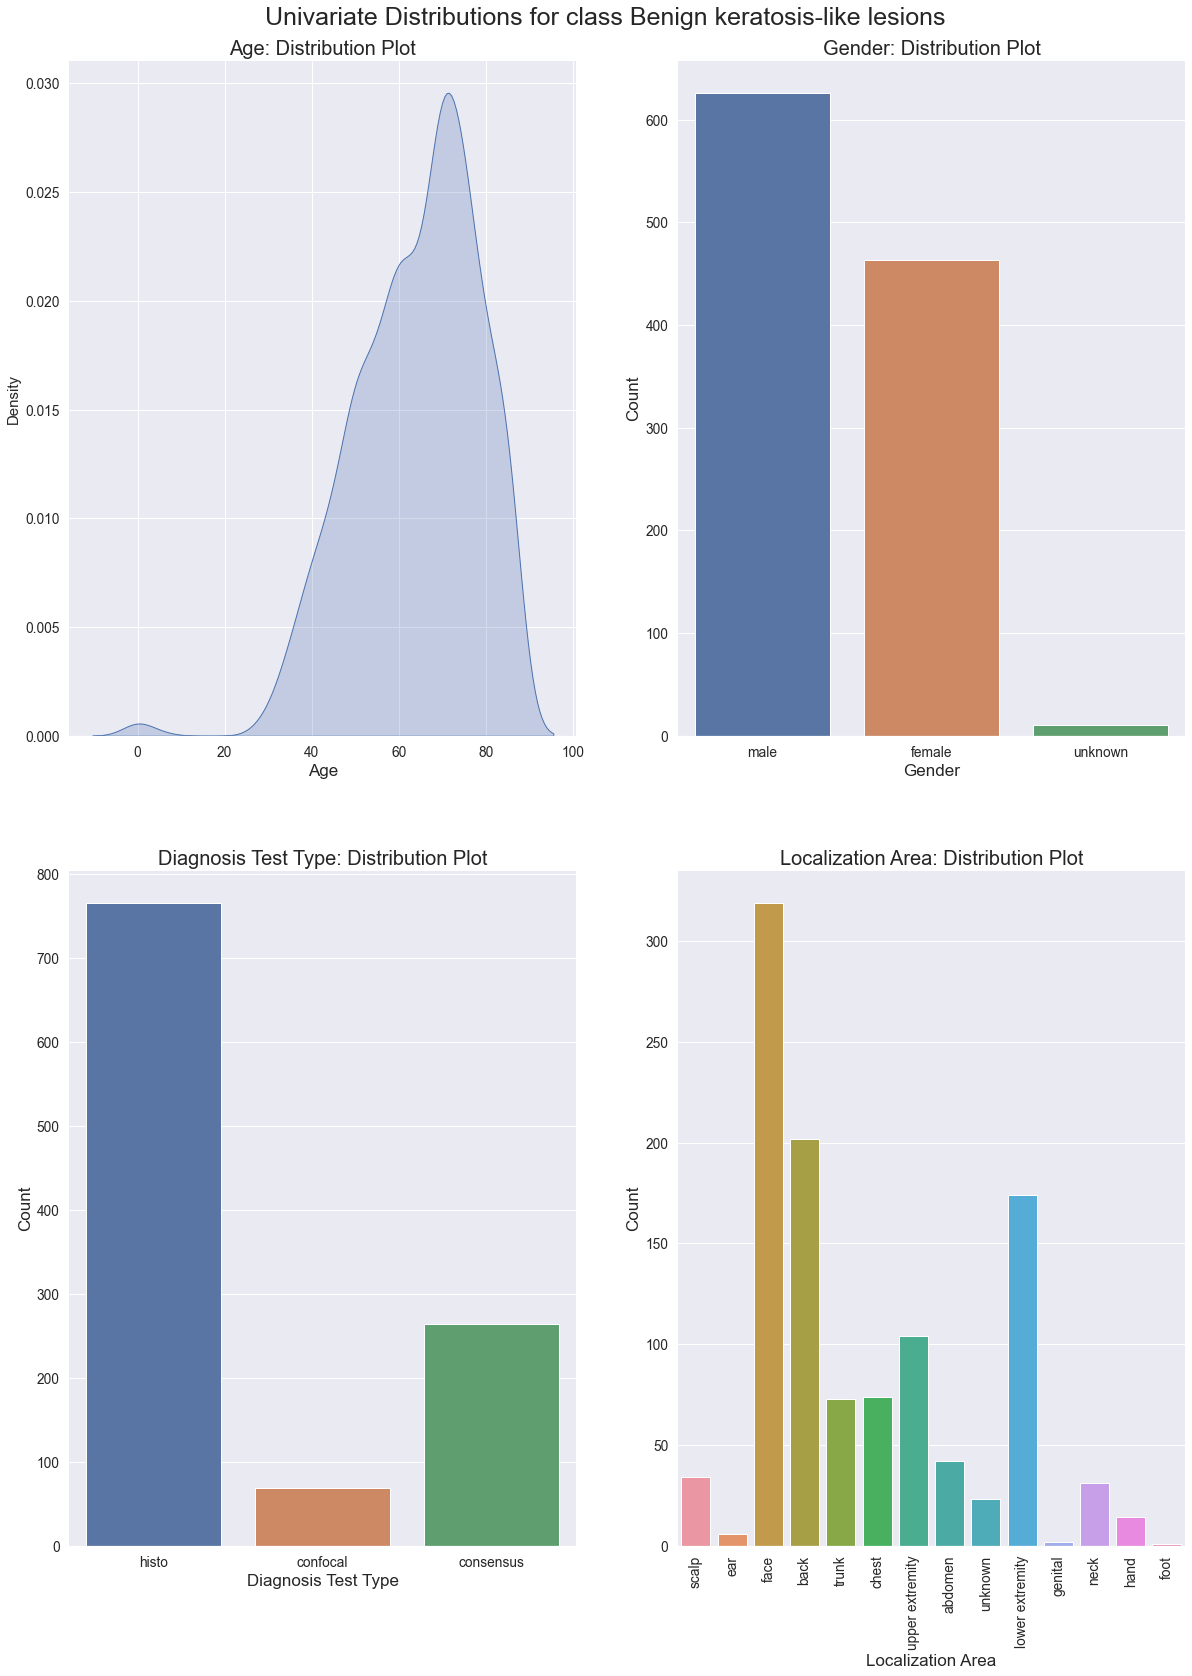

In [59]:
for _ in set(dataset.cell_type):
    class_analysis(dataset,_)

Final Reports

1. Localization, Age and Gender show different class-wise univariate distributions

2. Use of these along with images would help in increasing the accuracy of the model, as they represent the real world representations of these class-wise features